In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter
from skimage import measure

ModuleNotFoundError: No module named 'skimage'

In [4]:
def data(n_values, sr_values, PTE0, PTE, Plot):
   PTE_ratio = PTE/PTE0
   PTE_ratio_unc = np.sqrt(PTE)/2_000_000
   
   if Plot:
       
       plt.figure(figsize=(8, 6))
       plt.imshow(PTE_ratio, cmap = 'inferno', origin="lower",
                  extent=[n_values.min(), n_values.max(), sr_values.min(), 
                          sr_values.max()])
       plt.colorbar(label="Intensity")
       plt.xlabel("Real Part of the Refractive Index (n)")
       plt.ylabel("Specular Ratio")
       plt.title("Thermal Map of Data")

   plt.show()
   
   return PTE_ratio, PTE_ratio_unc

In [5]:
def basic_score(n_values, sr_values, PTE, A, PTE_unc, A_unc, Plot, name):
    a = PTE - A
    sgn_a = np.sign(a)
    
    score = -np.sqrt(np.abs(a))
    score_unc = np.sqrt( ((sgn_a/(2*np.sqrt(np.abs(a))))*PTE_unc)**2 
                        +((-sgn_a/(2*np.sqrt(np.abs(a))))*A_unc)**2)
    
    if Plot:
        plt.figure(figsize=(8, 6))
        plt.imshow(score, cmap = 'inferno', origin="lower",
                   extent=[n_values.min(), n_values.max(), sr_values.min(), 
                           sr_values.max()])

        plt.colorbar(label="PTE")
        plt.xlabel("Real Part of the Refractive Index (n)")
        plt.ylabel("Specular Ratio")
        plt.title(name)
    
        plt.show()
        
    return score, score_unc

In [6]:
def score(Type, n_values, sr_values, PTE_1, PTE_2, A_1, A_2, PTE_1_unc, PTE_2_unc, 
          A_1_unc, A_2_unc, Plot, name):
    a = PTE_1 - A_1 
    b = (PTE_2-PTE_1) - A_2
    
    if Type == 1:
        SCORE = -((a)**(2)+ (b)**(2))
        SCORE_unc = np.sqrt(((-2*a+2*b) * PTE_1_unc)**2 + (-2*b*PTE_2_unc)**2 
                            + (2*a*A_1_unc)**2 + (2*b*A_2_unc)**2
                            + 2*(-2*a+2*b)*(-2*b)*np.cov(PTE_1.flatten(), PTE_2.flatten())[0,1])
        
    if Type == 2:
        sgn_a = np.sign(a)
        sgn_b = np.sign(b)
        
        SCORE = -(np.abs(a)**(1/2) + np.abs(b)**(1/2))
        SCORE_unc = np.sqrt(((-sgn_a/(2*np.sqrt(np.abs(a))) + sgn_b/(2*np.sqrt(np.abs(b))))*PTE_1_unc)**2 
                            + ((-sgn_b/(2*np.sqrt(np.abs(b))))*PTE_2_unc)**2 
                            + ((sgn_a/(2*np.sqrt(np.abs(a))))*A_1_unc)**2 
                            + ((sgn_b/(2*np.sqrt(np.abs(b))))*A_2_unc)**2 
                            + 2 * (-sgn_a/(2*np.sqrt(np.abs(a))) + sgn_b/(2*np.sqrt(np.abs(b)))) * (-sgn_b/(2*np.sqrt(np.abs(b)))) * np.cov(PTE_1.flatten(), PTE_2.flatten())[0,1])
    
    if Plot:
        plt.figure(figsize=(8, 6))
        plt.imshow(SCORE, cmap = 'inferno', origin="lower",
                   extent=[n_values.min(), n_values.max(), sr_values.min(), 
                           sr_values.max()])

        plt.colorbar(label="Score Value")
        plt.xlabel("Real Part of the Refractive Index (n)")
        plt.ylabel("Specular Ratio")
        plt.title(name)
    
        plt.show()
    
    return SCORE, SCORE_unc

In [7]:
file_path_PTE4_short = '../../../Sweep-Txt-Files/Nick_PTE4_Short_2DSweep.txt'
file_path_PTE8_short = '../../../Sweep-Txt-Files/matrix_8_short_n_0.2-1.2_sr_0-1.txt'
file_path_PTE4_tall = '../../../Sweep-Txt-Files/matrix_4_tall_n_0.2-1.2_sr_0-1.txt'

In [8]:
n_values = np.linspace(0.2, 1.2, 256)  
sr_values = np.linspace(0, 1, 256)

In [16]:
# A40_tall = 1.847931884039425
A40_tall = 1.347931884039425
A80_short = 2.4475142293628296

A40_short = 1.072 * A40_tall
# A40_short = 1.65

A40_short_unc = 1.072 * 0.0028
A40_tall_unc = 0.0028
A80_short_unc = 0.0028


A84_short = A80_short - A40_short
A84_tall = A80_short - A40_tall

A84_short_unc = np.sqrt(A80_short_unc**2 + A40_short_unc**2)
A84_tall_unc = np.sqrt(A80_short_unc**2 + A40_tall_unc**2)

In [10]:
PTE0 = 0.00135989
PTE0_tall = 0.001268

PTE4_short = np.flip(np.loadtxt(file_path_PTE4_short))
PTE4_tall = np.flip(np.loadtxt(file_path_PTE4_tall))
PTE8_short = np.flip(np.loadtxt(file_path_PTE8_short))

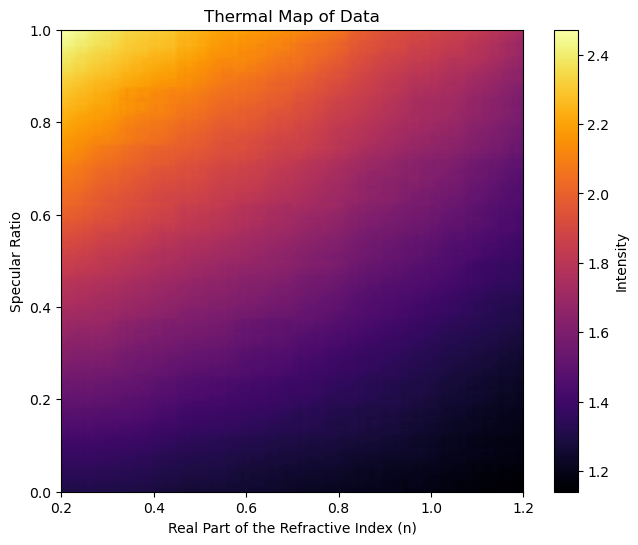

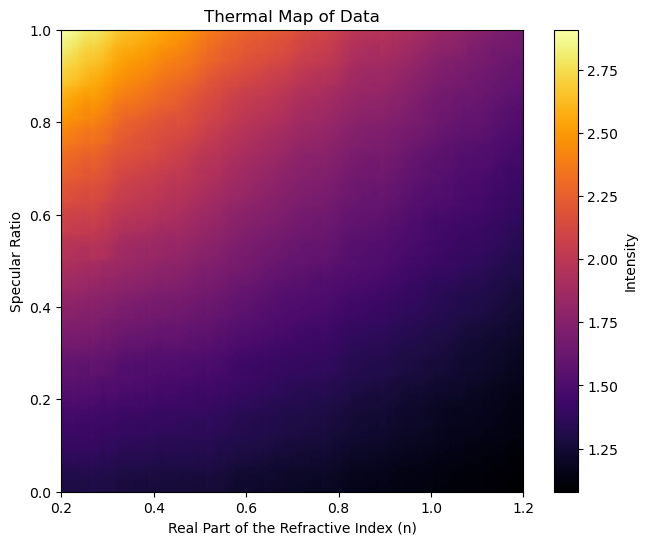

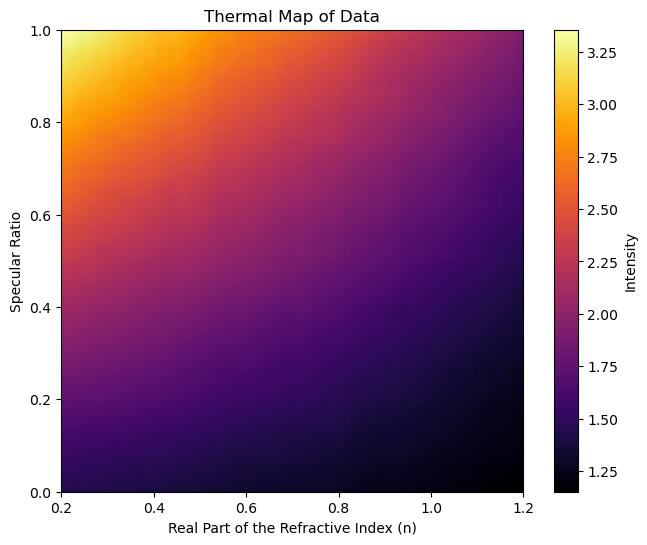

In [13]:
PTE4_short_ratio, PTE4_short_ratio_unc = data(n_values, sr_values, PTE0, PTE4_short, True)
PTE4_tall_ratio, PTE4_tall_ratio_unc = data(n_values, sr_values, PTE0_tall, PTE4_tall, True)
PTE8_short_ratio, PTE8_short_ratio_unc = data(n_values, sr_values, PTE0, PTE8_short, True)

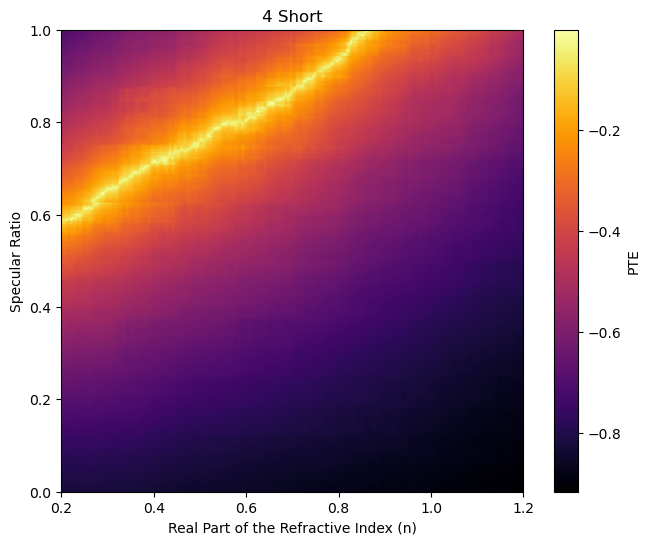

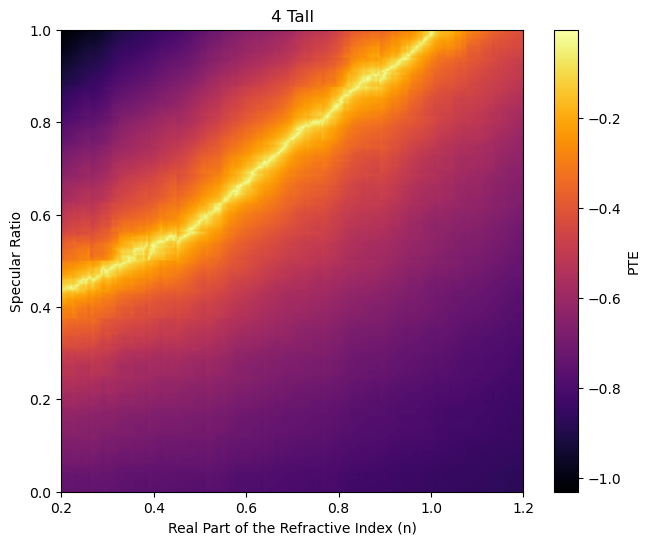

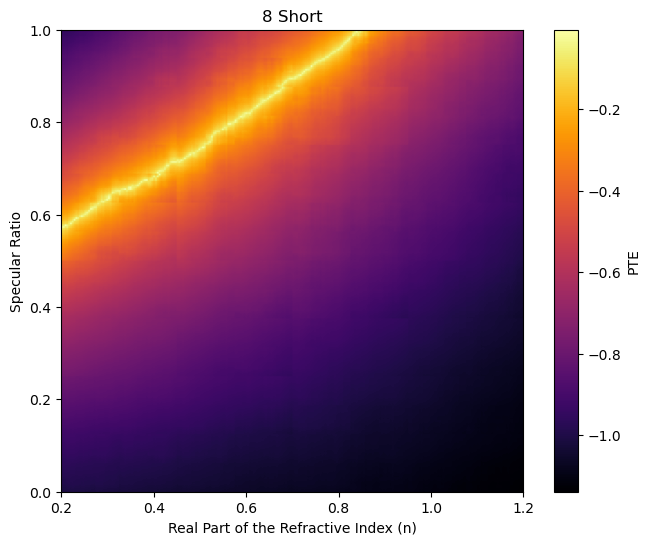

In [14]:
score4_short,  score4_short_unc = basic_score(n_values, sr_values, PTE4_short_ratio, A40_short, PTE4_short_ratio_unc, A40_short_unc, True, '4 Short')
score4_tall, score4_tall_unc = basic_score(n_values, sr_values, PTE4_tall_ratio, A40_tall, PTE4_tall_ratio_unc, A40_tall_unc, True, '4 Tall')
score8_short,  score8_short_unc = basic_score(n_values, sr_values, PTE8_short_ratio, A80_short, PTE8_short_ratio_unc, A80_short_unc, True, '8 Short')

/tmp/ipykernel_1638063/2030380747.py:17: RuntimeWarning: invalid value encountered in sqrt
  SCORE_unc = np.sqrt(((-sgn_a/(2*np.sqrt(np.abs(a))) + sgn_b/(2*np.sqrt(np.abs(b))))*PTE_1_unc)**2


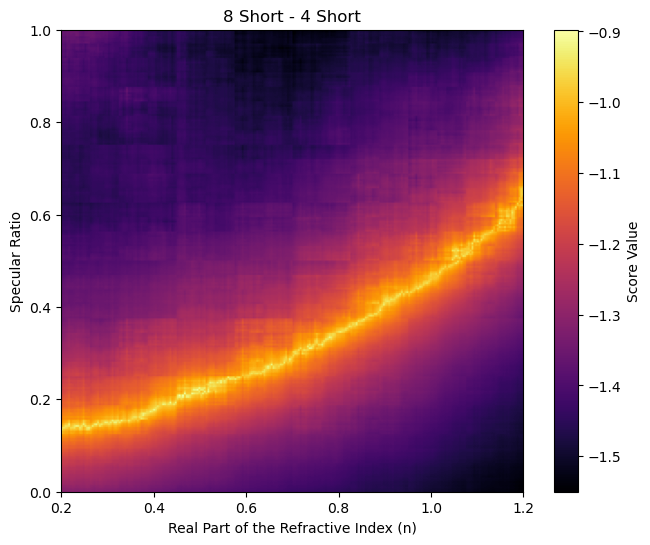

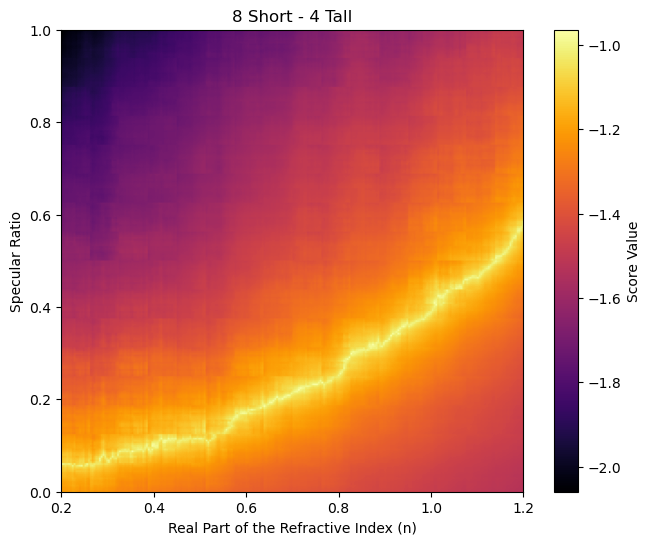

In [17]:
score_8_4_short, score_8_4_short_unc = score(2, n_values, sr_values, PTE4_short_ratio, PTE8_short_ratio, A40_short, A84_short, PTE4_short_ratio_unc, PTE8_short_ratio_unc, A40_short_unc, A84_short_unc, True, '8 Short - 4 Short')
score_8_4_tall, score_8_4_tall_unc = score(2, n_values, sr_values, PTE4_tall_ratio, PTE8_short_ratio, A40_tall, A84_tall, PTE4_tall_ratio_unc, PTE8_short_ratio_unc, A40_tall_unc, A84_tall_unc, True, '8 Short - 4 Tall')


In [1]:
def overlay_score(n, sr, score1, score2, score3, score1_unc, score2_unc, score3_unc):
    

SyntaxError: incomplete input (3519748303.py, line 2)